In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need.

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "food-101"
sz=224

I will use a few shell commands to see the data organization

In [5]:
!ls {PATH}

images	license_agreement.txt  meta  models  README.txt  tmp  train  valid


In [6]:
!ls {PATH}/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [7]:
!ls {PATH}/images/ceviche

1006106.jpg  1596761.jpg  2173304.jpg  2842379.jpg  3508231.jpg  476694.jpg
1013481.jpg  1598011.jpg  21762.jpg    2850751.jpg  3508885.jpg  48585.jpg
1014769.jpg  1598359.jpg  217909.jpg   2852596.jpg  3509359.jpg  488448.jpg
1015455.jpg  1598381.jpg  2210693.jpg  2856387.jpg  3510356.jpg  489039.jpg
102574.jpg   1608027.jpg  2211019.jpg  2863141.jpg  3510731.jpg  494515.jpg
1027751.jpg  1609237.jpg  2214821.jpg  2864562.jpg  3513802.jpg  496283.jpg
1030519.jpg  1610308.jpg  2218232.jpg  2865614.jpg  3514361.jpg  496996.jpg
1033875.jpg  161277.jpg   2228304.jpg  288121.jpg   3515326.jpg  500500.jpg
1041212.jpg  1613256.jpg  2229476.jpg  2882262.jpg  352191.jpg	 501628.jpg
104222.jpg   1615264.jpg  2230373.jpg  2884540.jpg  3523081.jpg  504927.jpg
1043736.jpg  1615626.jpg  2231137.jpg  2887423.jpg  3523288.jpg  508563.jpg
104425.jpg   1622444.jpg  2231445.jpg  2900387.jpg  3523325.jpg  510203.jpg
104818.jpg   1624877.jpg  223162.jpg   2907309.jpg  3527978.jpg  510774.jpg
1052784.jpg  1

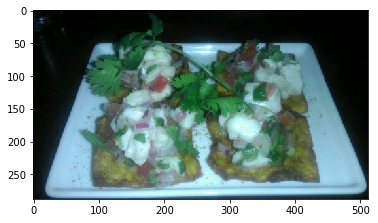

In [8]:
files = !ls {PATH}/images/ceviche | head
img = plt.imread(f'{PATH}/images/ceviche/{files[0]}')
plt.imshow(img);

In [9]:
img.shape

(288, 512, 3)

In [10]:
img[:4,:4]

array([[[ 3, 14, 10],
        [ 2, 11,  6],
        [ 2,  8,  4],
        [ 4,  6,  1]],

       [[ 3, 14, 10],
        [ 1, 12,  8],
        [ 2,  8,  4],
        [ 4,  6,  1]],

       [[ 3, 15, 13],
        [ 2, 13,  9],
        [ 3,  9,  5],
        [ 3,  8,  2]],

       [[ 6, 18, 16],
        [ 5, 16, 12],
        [ 4, 13,  8],
        [ 6, 11,  5]]], dtype=uint8)

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. 

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks).

Here's how to train and evalulate a *food 101* model in 3 lines of code, and under 20 seconds:

In [11]:
arch=resnet34
# data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
# learn = ConvLearner.pretrained(arch, data, precompute=True)
# learn.fit(0.01, 3)

In [12]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [13]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [14]:
learn.fit(1e-2, 1)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       2.28419  1.75127  0.56142]                         



In [15]:
learn.fit(1e-2, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       2.11524  1.65294  0.58345]                         
[ 1.       2.07449  1.59269  0.59725]                         



In [ ]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

In [ ]:
learn.save('place')

In [ ]:
learn.load('place')

In [ ]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)